In [2]:
pip install gdown

In [3]:
import gdown
import pandas as pd

# First, we'll get the dataset
!gdown https://drive.google.com/uc?id=12BX2L0lJgI1hO5-_b731kZ6tNDWQotRQ

Downloading...
From: https://drive.google.com/uc?id=12BX2L0lJgI1hO5-_b731kZ6tNDWQotRQ
To: C:\Users\Jingwen Shi\Desktop\CancerComments20162019.csv

  0%|          | 0.00/46.9M [00:00<?, ?B/s]
  1%|          | 524k/46.9M [00:00<00:31, 1.48MB/s]
  3%|▎         | 1.57M/46.9M [00:00<00:12, 3.58MB/s]
  7%|▋         | 3.15M/46.9M [00:00<00:07, 6.24MB/s]
 10%|█         | 4.72M/46.9M [00:00<00:05, 7.97MB/s]
 13%|█▎        | 6.29M/46.9M [00:00<00:04, 9.14MB/s]
 17%|█▋        | 7.86M/46.9M [00:01<00:05, 6.99MB/s]
 19%|█▉        | 8.91M/46.9M [00:01<00:07, 5.25MB/s]
 21%|██        | 9.96M/46.9M [00:01<00:07, 4.96MB/s]
 23%|██▎       | 11.0M/46.9M [00:02<00:08, 4.13MB/s]
 25%|██▍       | 11.5M/46.9M [00:02<00:08, 3.95MB/s]
 26%|██▌       | 12.1M/46.9M [00:02<00:09, 3.80MB/s]
 27%|██▋       | 12.6M/46.9M [00:02<00:09, 3.64MB/s]
 28%|██▊       | 13.1M/46.9M [00:02<00:09, 3.56MB/s]
 29%|██▉       | 13.6M/46.9M [00:02<00:09, 3.43MB/s]
 30%|███       | 14.2M/46.9M [00:03<00:09, 3.40MB/s]
 31%|███▏      

In [144]:
import numpy as np

# We'll work in pandas for this task, so run this code to import the .csv into a pandas dataframe
df = pd.read_csv('CancerComments20162019.csv', low_memory=False)

# Print the list of column headers
column_headers = list(df.columns)
print(column_headers)

## Add num_comments to dataframe
np.random.seed(12345678)

num_rows = df.shape[0]
random_numbers = np.random.poisson(lam=10, size=num_rows)
random_numbers = np.clip(random_numbers, 0, 20)
df['num_comments'] = random_numbers

print(df.head())
print(df['num_comments'].dtype)

['body', 'score_hidden', 'archived', 'name', 'author', 'author_flair_text', 'downs', 'created_utc', 'subreddit_id', 'link_id', 'parent_id', 'score', 'retrieved_on', 'controversiality', 'gilded', 'id', 'subreddit', 'ups', 'distinguished', 'author_flair_css_class', 'removal_reason']
                                                body score_hidden archived  \
0  I have a similar story, though it's just begin...          NaN      NaN   
1  Its been 4 months now, i have to admit the sho...          NaN      NaN   
2                        How are you holding up man?          NaN      NaN   
3                                          [removed]          NaN      NaN   
4  My Dad in the beginning of all this had this c...          NaN      NaN   

   name       author author_flair_text  downs  created_utc subreddit_id  \
0   NaN  ianburnsred               NaN    NaN   1478485722     t5_2qixx   
1   NaN       reilmb               NaN    NaN   1478847947     t5_2qixx   
2   NaN  Kansas_City    

In [145]:
# 1. Remove Replies to Comments
# Check the first two characters of 'parent_id'. If it's 't1', the row is a reply to
# another comment and should be removed.

df['first_two']=df['parent_id'].apply(lambda word: word[:2] if isinstance(word, str) else '')
df = df[df['first_two'] != 't1']

In [146]:
# 2. Drop Unnecessary Columns
# Drop the following columns from the dataset: author, name

df = df.drop(columns=['author', 'name'])

In [147]:
# 3. Deal with Missing and Placeholder Content
# Remove rows where 'body' is '[deleted]' or '[removed]', and replace empty strings in 'body' with NaN.
# Then, drop rows with NaN in 'body'.

df = df[~df['body'].isin(['[deleted]', '[removed]'])]
df = df.dropna(subset=['body'])

In [148]:
# 4. Convert Text to Lowercase
# Convert all text in the 'body' column to lowercase.

df['body'] = df['body'].str.lower()

In [149]:
# 5. Implement a Word Count Filter
# Add a new column 'word_count' that represents the number of words in each comment.
# Then, filter the dataset to only include comments with 50 or more words.

df['word_count'] = df['body'].str.split().apply(len)
df = df[df['word_count'] >= 50]

In [150]:
df.to_csv('filtered_table.csv', index=False)

In [151]:
# 6. Remove Punctuation from Text
# For each comment in 'body', remove punctuation characters. Consider also removing other characters
# that might not be covered by the standard punctuation list.

import string
import re

remove_chars = string.punctuation
pattern = re.compile(f"[{re.escape(remove_chars)}]")
df['body'] = df['body'].astype(str).apply(lambda x: pattern.sub('', x))
df['body'] = df['body'].str.replace("’", '', regex=False)
print(df)

                                                     body score_hidden  \
0       i have a similar story though its just beginni...          NaN   
6       i have been sick with assumably bronchitis for...          NaN   
9       hope your dad is doing ok since you first post...          NaN   
20      in the middle of chemo i was dating  i just wa...          NaN   
33      its been really surreal discussing end of life...          NaN   
...                                                   ...          ...   
110127  i started watercolor painting from youtube vid...          NaN   
110131  i find it so frustrating that oncologists dont...          NaN   
110132  radiation fatigue was absolutely crippling dur...          NaN   
110133  ugh yeah try having sex as a girl after total ...          NaN   
110134  as someone finishing up her 4th cycle of blina...          NaN   

       archived                                  author_flair_text  downs  \
0           NaN                   

In [152]:
df.to_csv('processed_table.csv', index=False)

In [ ]:
# 1. Counting Specific Words
### QUALTRICS SURVEY QUESTION 3: PLEASE COPY YOUR CODE FOR THIS QUESTION INTO QUALTRICS

def count_specific_words(text, word_set):
    """
    Counts occurrences of specific words in a given text.

    Parameters:
    - text: The text to analyze.
    - word_set: A set of words to count within the text.

    Returns:
    - An integer representing the count of occurrences of the specified words.
    """

    """
    import nltk
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    nltk.download('punkt')
    nltk.download('wordnet')
    """
    
    text = text.lower()
    tokens = word_tokenize(text)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    word_count = {word: 0 for word in word_set}
    
    for word in lemmatized_tokens:
        if word in word_count:
            word_count[word] += 1
    
    return word_count

In [155]:
# 2. Identifying First-Person Narratives

def detect_first_person(text):
    """
    Identifies if a text contains first-person pronouns.

    Parameters:
    - text: The text to analyze.

    Returns:
    - A boolean indicating the presence of first-person pronouns in the text.
    """
    text = text.lower()
    
    first_person_pronouns = {
        "i", "me", "my", "mine", "myself",
        "we", "us", "our", "ours", "ourselves"
    }
    
    words = text.split()
    
    for word in words:
        if word in first_person_pronouns:
            return True
    
    return False

In [ ]:
def analyze_sentiment(text):
    """
    Analyzes the sentiment of a given text.

    Parameters:
    - text: The text to analyze.

    Returns:
    - A string indicating the sentiment of the text ('positive', 'negative', 'neutral').
    """

    """
    import nltk
    nltk.download('vader_lexicon')
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    """
    
    sia = SentimentIntensityAnalyzer()

    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# 4. Keyword Extraction
### QUALTRICS SURVEY QUESTION 4: PLEASE COPY YOUR CODE FOR THIS QUESTION INTO QUALTRICS

def extract_keywords(text):
    """
    Extracts key terms or phrases from a given text.

    Parameters:
    - text: The text to analyze.

    Returns:
    - A list of key terms or phrases identified within the text.
    """

    
    """
    import nltk
    from nltk.corpus import stopwords
    from nltk.rake import Rake
    nltk.download('stopwords')
    nltk.download('punkt')
    """
    
    rake = Rake(stopwords=set(stopwords.words('english')))
    
    rake.extract_keywords_from_text(text)
    
    ranked_phrases = rake.get_ranked_phrases()
    
    return ranked_phrases

In [ ]:
# 5. Removing stop words

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# English stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text, stopwords):
    """
    Removes stop words from a given text.

    Parameters:
    - text: The text to be processed.
    - stopwords: A set or list of stop words to be removed from the text.

    Returns:
    - A string with stop words removed. The function splits the input text into individual words, filters out any words that are in the stopwords set, and then rejoins the remaining words into a single string.
    """
    
    token_s = word_tokenize(text)
    sent = [word for word in token_s if not word.lower() in stopwords.words('english')]
    filtered_text = ' '.join(sent)
    
    return filtered_text

In [107]:
import collections

In [108]:
from collections import Counter

In [109]:
# 1. Frequency of Specific Words Related to Cancer
# Generate a count of how many times certain cancer-related words appear across all comments.
# This could help identify the most discussed topics related to cancer.
### QUALTRICS SURVEY QUESTION 5: HOW MANY TIMES DOES THE TERM "chemotherapy" OCCUR ACROSS ALL COMMENTS


word_set = {"cancer", "treatment", "chemotherapy", "radiation", "survivor"}


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')


def count_cancer_related_words(csv_file, word_set):
    
    df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")
    
    comments = df['body'].tolist()
    word_counter = Counter()
    lemmatizer = WordNetLemmatizer()
    
    for comment in comments:
        tokens = word_tokenize(comment.lower())
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        for word in word_set:
            word_counter[word] += tokens.count(word)
    return word_counter

csv_file = 'word_frequency.csv'
word_frequencies = count_cancer_related_words(csv_file, word_set)

for word, count in word_frequencies.items():
    print(f'{word}: {count}')

[nltk_data] Downloading package punkt to C:\Users\Jingwen
[nltk_data]     Shi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jingwen
[nltk_data]     Shi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


treatment: 8768
radiation: 3375
cancer: 25674
chemotherapy: 965
survivor: 472


In [114]:
# 2. Proportion of First-Person Narratives
# Determine what percentage of the comments are written in the first person,
# suggesting personal experiences or stories related to cancer.

first_person_pronouns = {
        "i", "me", "my", "mine", "myself",
        "we", "us", "our", "ours", "ourselves"
}
    
def calculate_first_person_percentage(csv_file, pronouns):

    df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")
    comments = df['body'].tolist()
    
    first_person_count = 0
    
    for comment in comments:
        words = word_tokenize(comment.lower())
        if any(pronoun in words for pronoun in pronouns):
            first_person_count += 1
    
    total_comments = len(comments)
    first_person_percentage = (first_person_count / total_comments) * 100
    
    return first_person_percentage

first_person_percentage = calculate_first_person_percentage(csv_file, first_person_pronouns)

print(f'Percentage of comments written in the first person: {first_person_percentage:.2f}%')

Percentage of comments written in the first person: 93.50%


In [115]:
# 3. Overall Sentiment Distribution
# Apply sentiment analysis to understand the distribution of sentiments
#  (positive, negative, neutral) within the comments.

import nltk
from nltk import download
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
def analyze_sentiment(text):
    
    sia = SentimentIntensityAnalyzer()

    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        return 'neutral'
    
def analyze_sentiment_distribution(csv_file):
    
    df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")
    
    
    sentiment_counts = {
        'positive': 0,
        'negative': 0,
        'neutral': 0
    }
    
    for comment in df['body']:
        sentiment = analyze_sentiment(comment)
        sentiment_counts[sentiment] += 1
    return sentiment_counts


sentiment_distribution = analyze_sentiment_distribution(csv_file)

print(f"Sentiment distribution:")
print(f"Positive: {sentiment_distribution['positive']}")
print(f"Negative: {sentiment_distribution['negative']}")
print(f"Neutral: {sentiment_distribution['neutral']}")

[nltk_data] Downloading package vader_lexicon to C:\Users\Jingwen
[nltk_data]     Shi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment distribution:
Positive: 16505
Negative: 10557
Neutral: 415


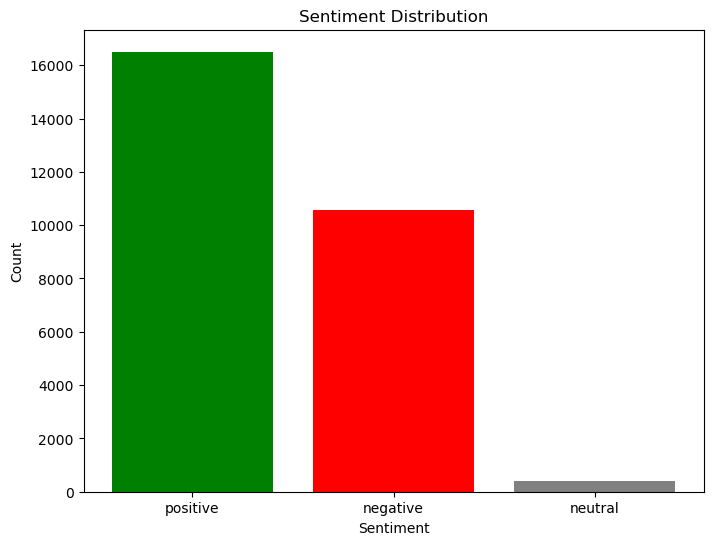

In [116]:
import matplotlib.pyplot as plt

def plot_sentiment_distribution(sentiment_distribution):

    categories = list(sentiment_distribution.keys())
    counts = list(sentiment_distribution.values())
    
    plt.figure(figsize=(8, 6))
    plt.bar(categories, counts, color=['green', 'red', 'gray'])
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

plot_sentiment_distribution(sentiment_distribution)

In [153]:
# 4. Top 20 Keywords
# Identify the top 20 keywords or phrases that appear in the comments,
# indicating the main focus areas of discussion.

import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


def extract_keywords(text, stopwords):
    words = word_tokenize(text)
    word_counts = Counter(words)
    return word_counts.most_common(20)

def identify_top_keywords(csv_file):

    df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")
    overall_word_counts = Counter()
    
    for comment in df['body']:
        keywords = extract_keywords(comment, stop_words)
        overall_word_counts.update(dict(keywords))

    top_keywords = overall_word_counts.most_common(20)
    return top_keywords

top_keywords = identify_top_keywords(csv_file)

print("Top 20 keywords or phrases:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")

[nltk_data] Downloading package stopwords to C:\Users\Jingwen
[nltk_data]     Shi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jingwen
[nltk_data]     Shi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 20 keywords or phrases:
to: 107326
and: 97983
the: 97976
i: 96763
a: 73374
you: 58668
of: 48956
it: 44049
my: 39311
that: 33738
is: 33413
in: 29927
for: 29336
was: 25168
your: 22231
with: 20017
have: 18135
but: 17233
cancer: 17057
be: 16026


In [118]:
# 5. Most Common Starting Words
# Find the 20 most common starting words used in the comments.
# This could reveal how people typically begin their comments or stories.

import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def find_common_starting_words(csv_file):
    df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")
    starting_word_counts = Counter()
    
    for comment in df['body']:
        words = word_tokenize(comment)
        
        if words:
            starting_word = words[0].lower()
            starting_word_counts[starting_word] += 1
    
    top_starting_words = starting_word_counts.most_common(20)
    
    return top_starting_words

top_starting_words = find_common_starting_words(csv_file)

print("Top 20 most common starting words:")
for word, count in top_starting_words:
    print(f"{word}: {count}")

[nltk_data] Downloading package punkt to C:\Users\Jingwen
[nltk_data]     Shi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 20 most common starting words:
i: 8780
my: 1807
it: 873
hey: 688
you: 673
hi: 582
the: 514
this: 425
if: 381
so: 321
sorry: 298
there: 296
first: 273
when: 244
as: 236
yes: 225
that: 196
just: 192
thank: 189
not: 174


In [117]:
# 6. Top 20 Words in General
# Extract the top 20 most frequently occurring words in the comments,
# after removing stop words to focus on more meaningful content.

import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


def extract_keywords(text, stopwords):
    words = word_tokenize(text)
    words_filtered = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]
    word_counts = Counter(words_filtered)
    return word_counts.most_common(20)

def identify_top_keywords(csv_file):

    df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")
    overall_word_counts = Counter()
    
    for comment in df['body']:
        keywords = extract_keywords(comment, stop_words)
        overall_word_counts.update(dict(keywords))

    top_keywords = overall_word_counts.most_common(20)
    return top_keywords

top_keywords = identify_top_keywords(csv_file)

print("Top 20 keywords or phrases:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")

[nltk_data] Downloading package stopwords to C:\Users\Jingwen
[nltk_data]     Shi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jingwen
[nltk_data]     Shi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 20 keywords or phrases:
cancer: 22510
chemo: 8297
like: 8122
get: 8104
time: 7934
know: 7233
would: 6650
treatment: 6192
one: 6050
people: 5175
going: 4877
feel: 4721
really: 4659
also: 4605
good: 4441
mom: 4389
life: 4303
help: 3914
much: 3800
years: 3791


In [154]:
# 1. Does the sentiment of a post correlate with user engagement (as measured by num_comments)?

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sia = SentimentIntensityAnalyzer()
def classify_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] > 0.05:
        return 1  # Positive sentiment
    elif sentiment_score['compound'] < -0.05:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment
    
df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")

df['sentiment'] = df['body'].apply(classify_sentiment)

X = df[['sentiment']]
y = df['num_comments']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

print('Regression coefficients:', model.coef_)

print('Intercept:', model.intercept_)

Mean Squared Error: 9.979912996512164
R-squared (R2) Score: 3.8264188451098136e-07
Regression coefficients: [9.58970675e-05]
Intercept: 9.984648949506088


In [162]:
# 2. Do posts written in the first person receive more engagement (as measured by num_comments)
# compared to other posts. Please use a boolean variable indicating first-person narratives.


df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")

df['is_first_person'] = df['body'].apply(detect_first_person)

X = df[['is_first_person']]
y = df['num_comments']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

print('Regression coefficients:', model.coef_)

print('Intercept:', model.intercept_)

Mean Squared Error: 9.97959649352314
R-squared (R2) Score: 3.209663258041395e-05
Regression coefficients: [-0.03551811]
Intercept: 10.017289459007252


In [159]:
# 3. Does the time of day that a post is posted (using created_utc) influence the engagement as
# measured by num_comments) with the post. You may need to convert the timestamp into a more interpretable format,
# like part of the day.

df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")

df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

def categorize_time_of_day(dt):
    hour = dt.hour
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['created_utc'].apply(categorize_time_of_day)

df = pd.get_dummies(df, columns=['time_of_day'], drop_first=True)

X = df[['time_of_day_morning', 'time_of_day_evening', 'time_of_day_night']]
y = df['num_comments']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

print('Regression coefficients:', model.coef_)

print('Intercept:', model.intercept_)

Mean Squared Error: 9.980142474778662
R-squared (R2) Score: -2.261136405201647e-05
Regression coefficients: [0.01539665 0.09686474 0.05278921]
Intercept: 9.938737519038755


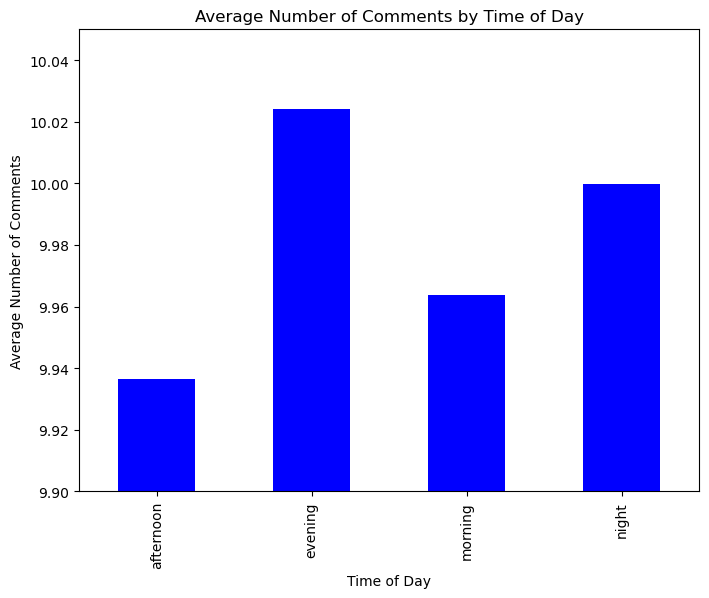

In [168]:
# 4. Pick one of the above questions, and create a graph that you think explains the nature of the relationship.

import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")

df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df['time_of_day'] = df['created_utc'].apply(categorize_time_of_day)

avg_comments_by_time_of_day = df.groupby('time_of_day')['num_comments'].mean()

plt.figure(figsize=(8, 6))
avg_comments_by_time_of_day.plot(kind='bar', color='blue')
plt.xlabel('Time of Day')
plt.ylabel('Average Number of Comments')
plt.title('Average Number of Comments by Time of Day')
plt.ylim(9.9,10.05)
plt.show()

In [170]:
# 1. First, create a random variable indicating treatment status. A post can be considered treated if the
# final digit of the timestamp is less than 5.

df = pd.read_csv("C:/Users/Jingwen Shi/Desktop/processed_table.csv")

df['created_utc'] = df['created_utc'].astype(str)

df['final_digit'] = df['created_utc'].apply(lambda x: int(x[-1]))

df['treatment_status'] = df['final_digit'].apply(lambda x: 1 if x < 5 else 0)

print(df[['created_utc', 'final_digit', 'treatment_status']].head())

  created_utc  final_digit  treatment_status
0  1478485722            2                 1
1  1481524669            9                 0
2  1481684777            7                 0
3  1479537185            5                 0
4  1478793060            0                 1


In [172]:
import statsmodels.api as sm

y = df['word_count']
X = df[['treatment_status']]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             word_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4444
Date:                Thu, 18 Apr 2024   Prob (F-statistic):              0.505
Time:                        17:19:55   Log-Likelihood:            -1.6473e+05
No. Observations:               27477   AIC:                         3.295e+05
Df Residuals:                   27475   BIC:                         3.295e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              130.7943      0.827  

In [173]:
df['is_first_person'] = df['body'].apply(detect_first_person)
y = df['is_first_person']
X = df[['treatment_status']]

X = sm.add_constant(X)

model = sm.Logit(y, X)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.285889
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        is_first_person   No. Observations:                27477
Model:                          Logit   Df Residuals:                    27475
Method:                           MLE   Df Model:                            1
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:               2.795e-05
Time:                        17:22:00   Log-Likelihood:                -7855.4
converged:                       True   LL-Null:                       -7855.6
Covariance Type:            nonrobust   LLR p-value:                    0.5076
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.3887      0.031     77.828      0.000       2.329       2.449
treatment_s